# Lab: Pokémon Data Classification

## Objective
This notebook demonstrates how to classify Pokémon as legendary or not using two machine learning models:
- Logistic Regression
- Multi-Layer Perceptron (MLP)

We will compare the performance of both models using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

## Step 1: Load and Explore the Dataset

In [23]:
# Your import 
import pandas as pd
import numpy as np

# Load the Pokémon dataset
pokemon_data =  pd.read_csv('pokemon.csv')

# Display the first few rows
pokemon_data.head(5)

,name,deck_no,attack,defense,sp_attack,sp_defense,speed,capture_rt,total_bs,type,gen,legendary
0,Bulbasaur,1,49,49,65,65,45,45,318,grass,1,0
1,Ivysaur,2,62,63,80,80,60,45,405,grass,1,0
2,Venusaur,3,100,123,122,120,80,45,625,grass,1,0
3,Charmander,4,52,43,60,50,65,45,309,fire,1,0
4,Charmeleon,5,64,58,80,65,80,45,405,fire,1,0


## Step 2: Data Preprocessing
### 2.1 Feature Engineering

### <span style="color:red">Please create a derived feature: sp_attack_to_sp_defense_ratio, Target is Legendary</span>. 

In [24]:
# Create a derived feature: sp_attack_to_sp_defense_ratio

# your code
pokemon_data['sp_attack_to_sp_defense_ratio'] = pokemon_data['sp_attack'] / pokemon_data['sp_defense']

# Select all features + derived  
# target: Legendary 
# Your code
features = ['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'total_bs',
            'capture_rt', 'type', 'sp_attack_to_sp_defense_ratio']
target = 'legendary'

# Define your features and target arrays
# Your code
X = pokemon_data[features]
y = pokemon_data[target]

### 2.2 Data Transformation Using ColumnTransformer

In [25]:
# Your import 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler

# Categorical and numerical columns
# your code
categorical_features = ['type']
numeric_features = [col for col in features if col not in categorical_features]

# Preprocessing pipeline
# please choose one suitable method as your scaling method
# please use OneHot as your Encoder
# Your code

# Similar deltas as attack and defense, and thus best suited
numeric_transformer = MaxAbsScaler() 
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num', MaxAbsScaler(),
                                 ['attack', 'defense', 'sp_attack',
                                  'sp_defense', 'speed', 'total_bs',
                                  'capture_rt',
                                  'sp_attack_to_sp_defense_ratio']),
                                ('cat', OneHotEncoder(), ['type'])])

### Prepare the training data

In [26]:
# Your import 
from sklearn.model_selection import train_test_split

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Train-test split
# Step 1: First train-test split to create training and temporary sets
# X_transformed: Preprocessed feature data
# y: Target labels
# test_size=0.3: Reserve 30% of the data for validation and test sets
# random_state=42: Ensures reproducibility of the splits
# stratify=y: Maintains the class distribution in the split

#Your code
X_train, X_temp, y_train, y_temp = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42, stratify=y
)

In [27]:
# Please use train_test_split to prepare your data

# Your code
# Step 2: Second split to create validation and test sets from the temporary set
# test_size=0.5: Splits the remaining 30% of the data equally into validation (15%) and test (15%) sets
# random_state=42: Ensures reproducibility
# stratify=y_temp: Maintains the class distribution in the split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

#Print your X_train and X_test
X_train[:2], X_test[:2]

(array([[0.35135135, 0.2826087 , 0.20618557, 0.17391304, 0.08333333,
         0.40384615, 0.74509804, 0.27007299, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        ],
        [0.45405405, 0.30434783, 0.33505155, 0.30434783, 0.28333333,
         0.52564103, 0.17647059, 0.25078206, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ]]),
 array([[0.51351351, 0.36956522, 0.56701031, 0.41304348, 0.43888889,
         0.68589744, 0.17647059, 0.3127161 , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 

## Step 3: Logistic Regression

In [28]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

# Please build your Logistic Regression model

# Train Logistic Regression
logistic_model = LogisticRegression(max_iter=300, random_state=42)
logistic_model.fit(X_train, y_train)

# Please use AUC and accuracy score to evaluate your model
# By trying different methods, your accuracy can reach over 90%.
y_val_prob_logistic = logistic_model.predict_proba(X_val)[:, 1]
auc_val_logistic = roc_auc_score(y_val, y_val_prob_logistic)

y_val_pred_logistic = logistic_model.predict(X_val)
accuracy_score_logistic = accuracy_score(y_val, y_val_pred_logistic)  # Use predicted labels here





print("Joshua Summers: Logistic Regression - Validation Performance:")
print(classification_report(y_val, y_val_pred_logistic))
print(f"Validation AUC: {auc_val_logistic:.4f}")
print(f"Validation accuracy: {accuracy_score_logistic:.4f}")

Joshua Summers: Logistic Regression - Validation Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       110
           1       0.83      0.50      0.62        10

    accuracy                           0.95       120
   macro avg       0.89      0.75      0.80       120
weighted avg       0.95      0.95      0.94       120

Validation AUC: 0.9855
Validation accuracy: 0.9500


## Step 4: Multi-Layer Perceptron (MLP)

In [29]:
from sklearn.neural_network import MLPClassifier

# Ignore all warnings
#import warnings
#warnings.filterwarnings("ignore")

# Please build your Multi-Layer Perceptron model

# Train MLP Classifier
# Hidden layer: 8 weights and 4 biases, activation: relu, iteration : 500
# Your code
mlp_model = MLPClassifier(hidden_layer_sizes=(8, 4), activation='relu', max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Evaluate MLP Classifier
# Please use AUC and accuracy score to evaluate your model
# By trying different methods, your accuracy can reach over 90%.
# Your code
y_val_pred_mlp = mlp_model.predict(X_val)
accuracy_score_mlp = accuracy_score(y_val, y_val_pred_mlp)

y_val_prob_mlp = mlp_model.predict_proba(X_val)[:, 1]
auc_val_mlp = roc_auc_score(y_val, y_val_prob_mlp)




print("Joshua Summers: MLP Classifier - Validation Performance:")
print(classification_report(y_val, y_val_pred_mlp))
print(f"Validation AUC: {auc_val_mlp:.4f}")
print(f"Validation accuracy: {accuracy_score_mlp:.4f}")

Joshua Summers: MLP Classifier - Validation Performance:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       0.82      0.90      0.86        10

    accuracy                           0.97       120
   macro avg       0.90      0.94      0.92       120
weighted avg       0.98      0.97      0.98       120

Validation AUC: 0.9873
Validation accuracy: 0.9750


## Step 5: Comparison of Models - Training Loss Curve

### Manually record the loss of logistic regression

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
# Please record your loss of logistic regression with 500 iterations
# Initialize the model with warm_start to fit incrementally
# Your code
logistic_model = LogisticRegression(
    max_iter=1,  # Run one iteration at a time
    solver='saga',  # The saga solver supports recording loss values during optimization
    random_state=42,
    warm_start=True  # Continue training from the last state, which allows manual recording of the loss at each iteration
)

# To store the loss values
loss_curve = []

# Train the model incrementally
# Your code
for i in range(1, 501):  # 500 iterations
    logistic_model.fit(X_train, y_train)  # Fit one iteration
    # Predict probabilities to calculate log loss
    y_train_prob = logistic_model.predict_proba(X_train)
    # Calculate the log loss and append to the loss curve
    loss = log_loss(y_train, y_train_prob)
    loss_curve.append(loss)


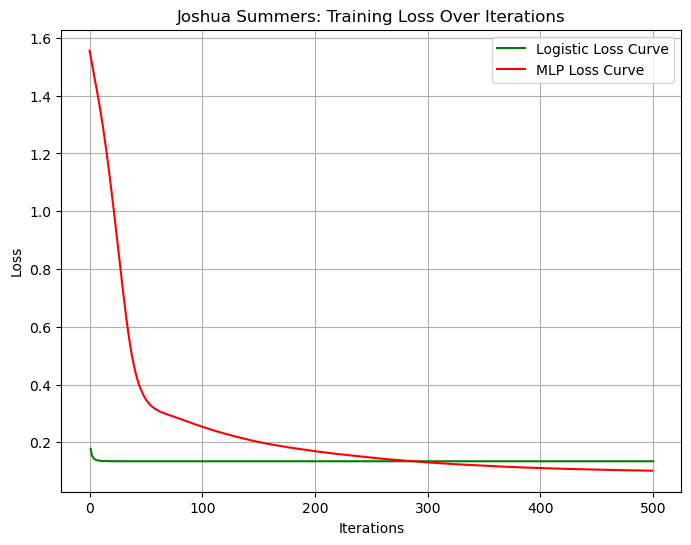

In [31]:
# Extract loss during MLP training
# Your code
mlp_model_loss_curve = mlp_model.loss_curve_
Logic_loss = loss_curve

# Plot the loss difference during MLP training and Logistic
# please set the color of Logistic as green, and MLP as red.
# Your code
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(Logic_loss) + 1), Logic_loss, label="Logistic Loss Curve", color="green")
plt.plot(mlp_model_loss_curve, label="MLP Loss Curve", color="red")
plt.xlabel("Iterations")
plt.ylabel("Loss")
yourname = "Joshua Summers"
plt.title(yourname+": Training Loss Over Iterations")
plt.grid()
plt.legend()
plt.show()


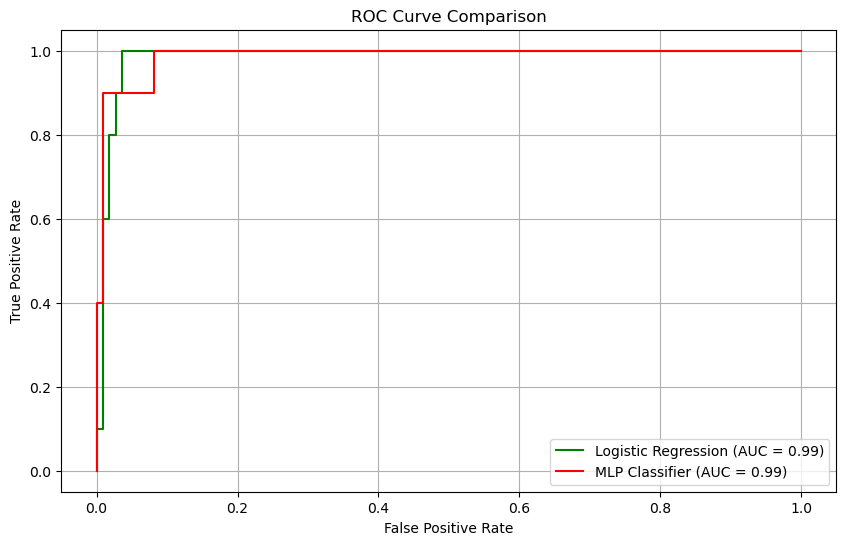

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
# Plot ROC Curve Comparison

# Plot ROC curves
# Your code
fpr_logistic, tpr_logistic, _ = roc_curve(y_val, y_val_prob_logistic)
fpr_mlp, tpr_mlp, _ = roc_curve(y_val, y_val_prob_mlp)
 
# please set the color of Logistic as green, and MLP as red.
# Your code
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f"Logistic Regression (AUC = {auc_val_logistic:.2f})", color="green")
plt.plot(fpr_mlp, tpr_mlp, label=f"MLP Classifier (AUC = {auc_val_mlp:.2f})", color="red")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
# Your idea:
# The MLP gives us a slightly better accuracy, but the AUC improvement is slight over simple logistic regression; this means that the data
# is well represented linearly with simple sigmoid activation without the complexity that MLP can provide.
# This is only true based on the scaling and training set generated.


## Step 6: Visualization of Predictions and Confusion Matrices

### 6.1 Actual vs Predicted Results

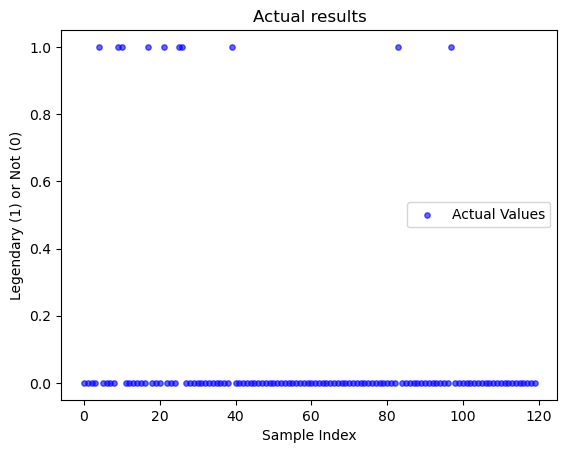

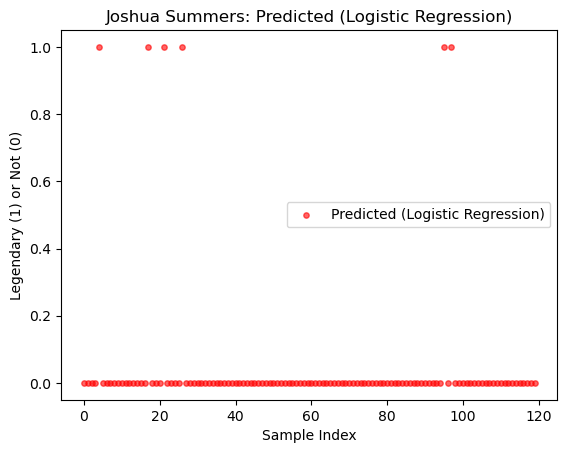

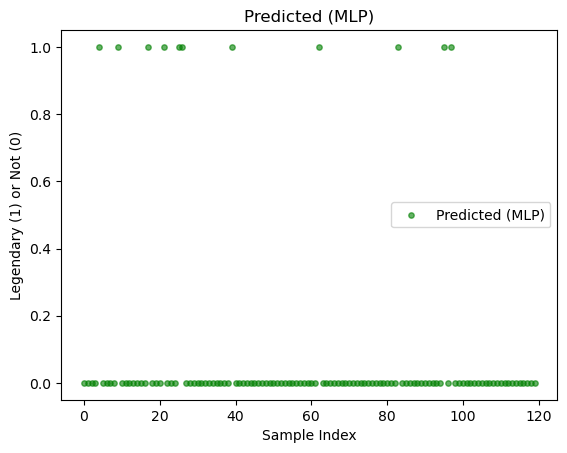

In [33]:
# Please plot the Actual data and the Predicted for the Logistic and MLP model
# Your code
plt.scatter(range(len(y_val)), y_val, color='blue', alpha=0.6, label="Actual Values", s=15)
plt.title("Actual results")
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()
plt.show()

plt.scatter(range(len(y_val)), y_val_pred_logistic, color='red', alpha=0.6, label="Predicted (Logistic Regression)", s=15)
plt.title("Joshua Summers: Predicted (Logistic Regression)")
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()
plt.show()

plt.scatter(range(len(y_val)), y_val_pred_mlp, color='green', alpha=0.6, label="Predicted (MLP)", s=15)
plt.title("Predicted (MLP)")
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()
plt.show()

### Confusion Matrices

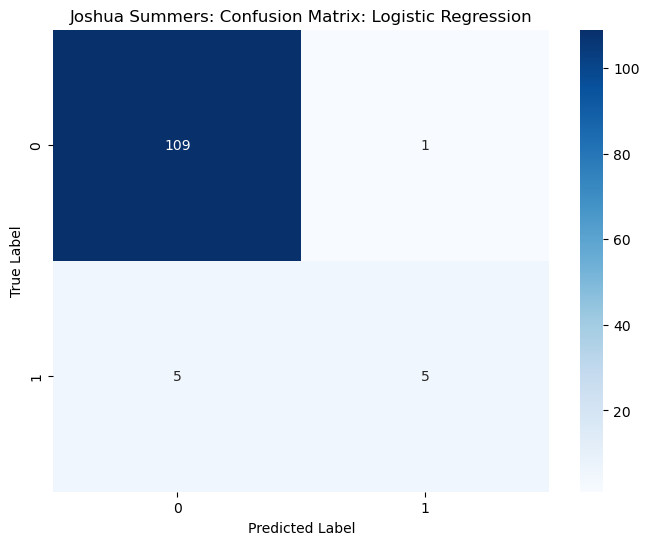

In [34]:
# plot Logistic Regression
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Logistic Regression

# your code
cm_logistic = confusion_matrix(y_val, y_val_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Blues")

plt.title("Joshua Summers: Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

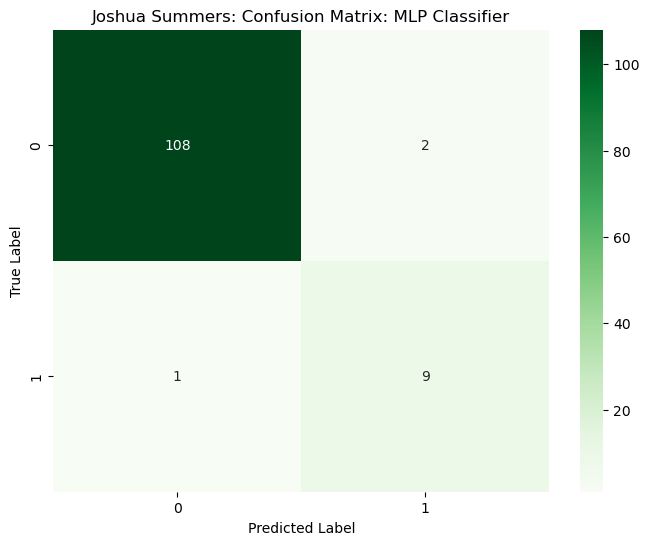

In [35]:
# plot MLP
# Your code
cm_mlp = confusion_matrix(y_val, y_val_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Greens")
plt.title("Joshua Summers: Confusion Matrix: MLP Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Conclusion

In [ ]:
# Please compare the differences and commonalities between Logistic results and MLP results
# Your idea :
# Logistic and give decent predictions about linear datasets, assuming good scaling can be achieved, and sigmoid activation is sufficient
# MLP can give much better accuracy and cover the outliers better than logistic regression does
# due to the complexity of the hidden layers and backpropagation.
# MLP is much more computationally expensive than logistic regression.
# MLP decision boundaries are often curved compared to the linear nature of logistic decision boundaries
# MLP can learn the features, where logistic requires the features to be defined.